<a href="https://colab.research.google.com/github/leia0/AI/blob/main/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

tensorflow 2 = tensorflow + keras

!!!! import keras -> import tensorflow.keras

In [1]:
from tensorflow.keras.datasets.mnist import load_data
# ((x_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test) = load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [2]:
import pandas as pd
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


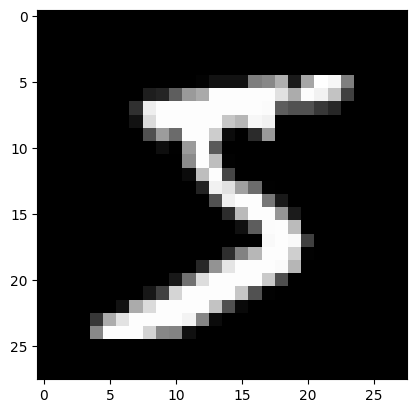

In [3]:
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
# cmap reverse: _r
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap="gray")

In [4]:
# 地基: Model(Sequential/Model)
# 樓層: Layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
layers = [
    # 100480 = 784 * 128 + 128(bias)
    Dense(128, activation="relu", input_dim=784),
    # 1290 = 128 * 10 + 10(bias)
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [5]:
# (X)輸出只有一個神經元: binary cross entropy
# q1: p1log(1/q1) + (1-p1)log(1/1-q1)
# n個神經元: categorical cross entropy
# p1log1/q1 + p2log1/q2 + ...
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(loss=CategoricalCrossentropy(),
       metrics=["accuracy"])

In [6]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [7]:
# X: scaling, 隨機係數是有在跟你的輸入作配合的
# 0~1 / -1~1
x_train_norm = x_train.reshape(-1, 784) / 255.0
x_test_norm = x_test.reshape(-1, 784) / 255.0
print(x_train.shape)
print(x_train_norm.shape)

(60000, 28, 28)
(60000, 784)


In [8]:
# demo
import numpy as np
n = np.array([
    [1, 2, 3],
    [4, 5, 6]
])
# -1: 自動推算(2)
n.reshape(3, -1)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
c = [
    ModelCheckpoint("mlp.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]
# batch_size = 20(圖片大或資料少)~200(圖片小或資料多)
# 54000 / 200 = 270(梯度下降)
# 沒做任何事: 差不多100個epch訓練完畢
# relu: 35epoch
# ce: 15epoch
model.fit(x_train_norm,
     y_train_cat,
     batch_size=200,
     epochs=100,
     validation_split=0.1,
     callbacks=c)

Epoch 1/100
270/270 [==============================] - 9s 9ms/step - loss: 0.3965 - accuracy: 0.8924 - val_loss: 0.1988 - val_accuracy: 0.9445
Epoch 2/100
270/270 [==============================] - 2s 6ms/step - loss: 0.1957 - accuracy: 0.9442 - val_loss: 0.1411 - val_accuracy: 0.9598
Epoch 3/100
270/270 [==============================] - 2s 6ms/step - loss: 0.1421 - accuracy: 0.9594 - val_loss: 0.1145 - val_accuracy: 0.9703
Epoch 4/100
270/270 [==============================] - 1s 5ms/step - loss: 0.1112 - accuracy: 0.9677 - val_loss: 0.0979 - val_accuracy: 0.9715
Epoch 5/100
270/270 [==============================] - 1s 5ms/step - loss: 0.0908 - accuracy: 0.9741 - val_loss: 0.0900 - val_accuracy: 0.9742
Epoch 6/100
270/270 [==============================] - 2s 6ms/step - loss: 0.0764 - accuracy: 0.9783 - val_loss: 0.0872 - val_accuracy: 0.9750
Epoch 7/100
270/270 [==============================] - 1s 5ms/step - loss: 0.0653 - accuracy: 0.9811 - val_loss: 0.0816 - val_accuracy: 0.9773

In [10]:
model.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0750 - accuracy: 0.9776


[0.07496819645166397, 0.9775999784469604]

In [11]:
from sklearn.metrics import confusion_matrix
pre = model.predict(x_test_norm).argmax(axis=-1)
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
      columns=["{}(pre)".format(i) for i in range(10)],
      index=["{}(true)".format(i) for i in range(10)])

313/313 [==============================] - 1s 1ms/step


,0(pre),1(pre),2(pre),3(pre),4(pre),5(pre),6(pre),7(pre),8(pre),9(pre)
0(true),973,0,0,1,0,0,1,1,3,1
1(true),0,1120,4,2,0,2,2,0,5,0
2(true),5,2,998,4,5,1,3,8,6,0
3(true),0,0,2,989,0,5,0,7,6,1
4(true),0,0,0,1,964,0,6,3,0,8
5(true),2,0,0,12,1,865,4,1,4,3
6(true),7,2,2,1,3,3,938,0,2,0
7(true),0,4,6,2,0,0,0,1009,2,5
8(true),4,0,1,4,4,5,3,6,946,1
9(true),4,3,0,5,12,3,0,6,2,974


In [12]:
# demo
# 不帶參數: 一維
# axis=0/1
n = np.array([
    [1, 2],
    [5, 6],
    [4, 3]
])
n.argmax(axis=-1)

array([1, 1, 0])

In [13]:
# demo:
# l = []
# for i in range(3):
#     l.append(i ** 2)
l = [i ** 2 for i in range(3)]
l

[0, 1, 4]

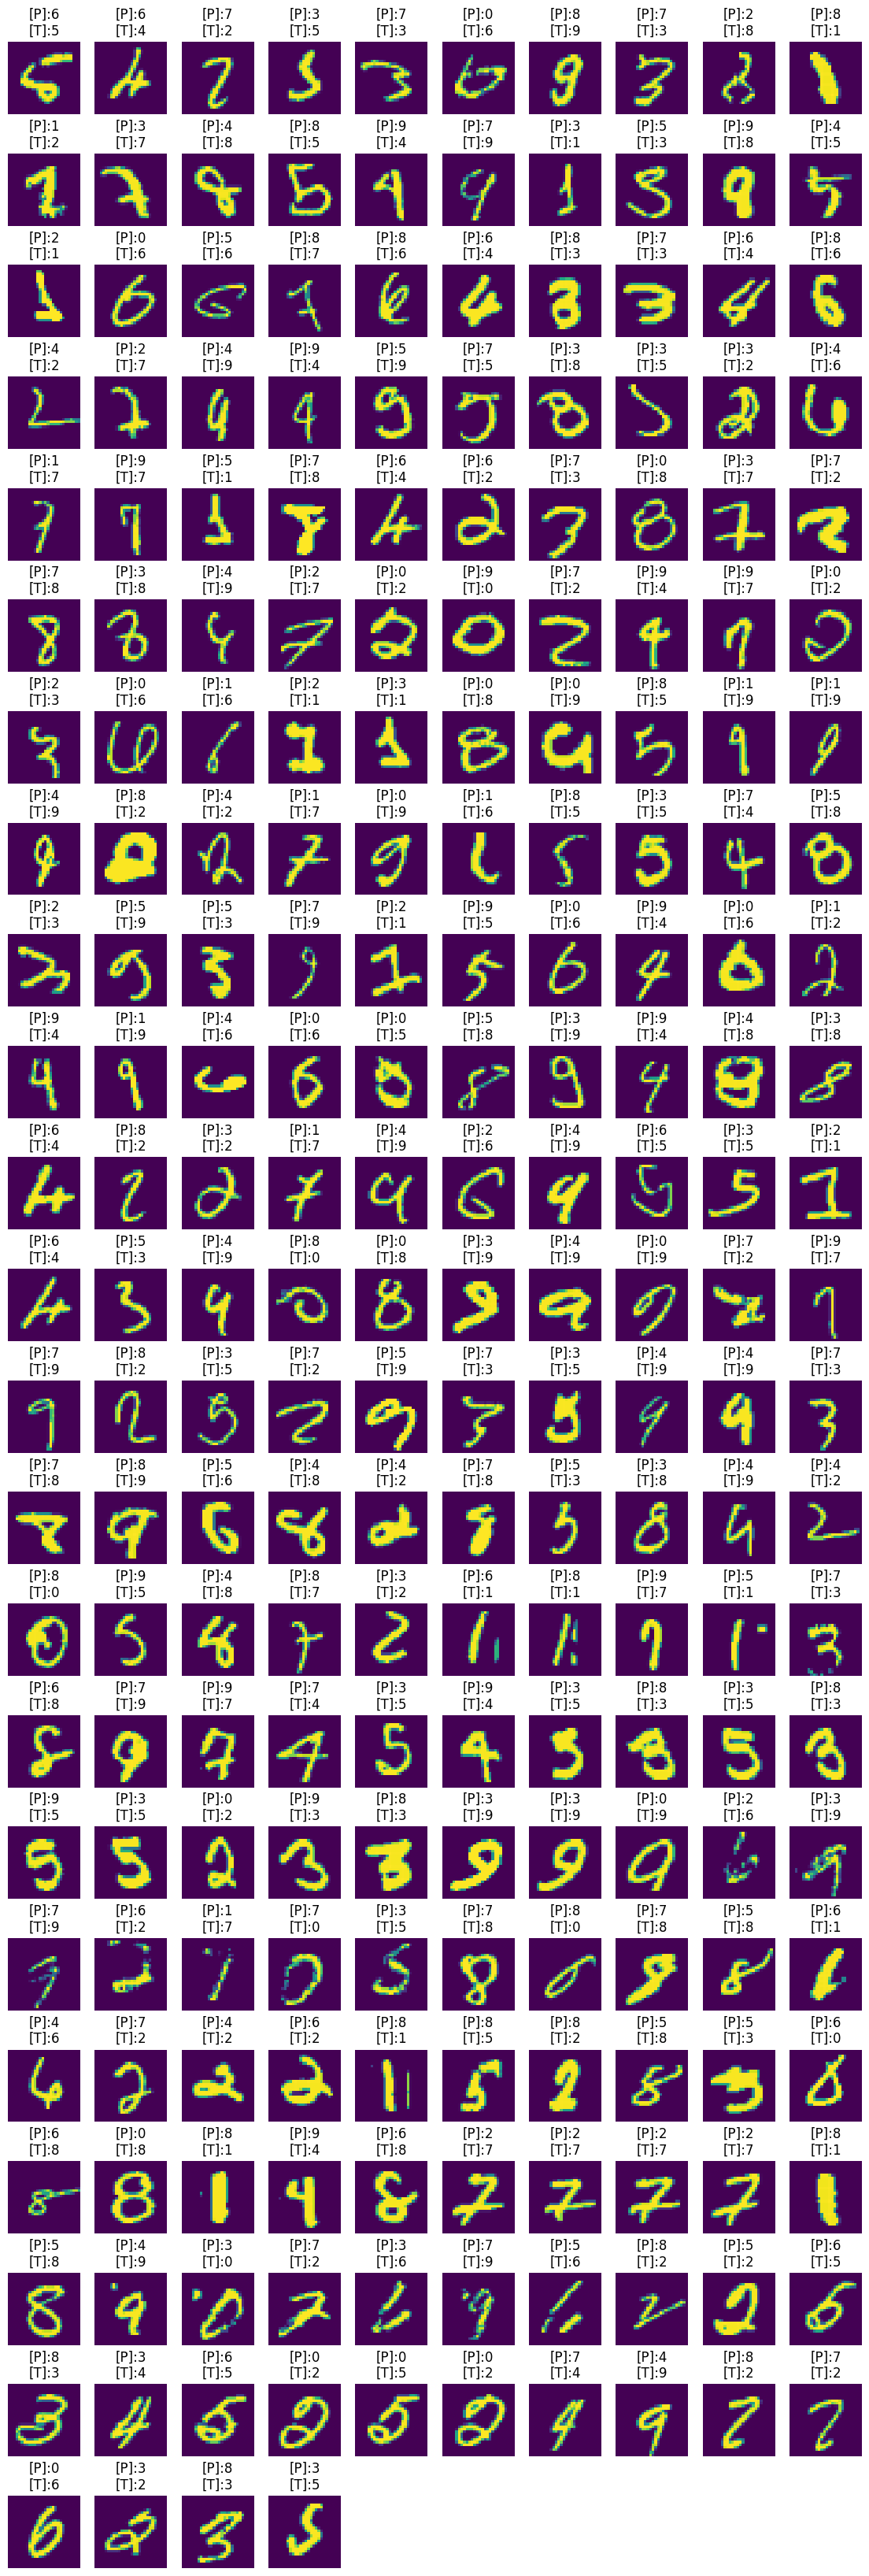

In [14]:
idx = np.nonzero(pre != y_test)[0]
false_pre = pre[idx]
false_true = y_test[idx]
false_img = x_test[idx]
plt.figure(figsize=(14, 42))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
    # 總高/總寬/ith
    plt.subplot(height, width, i+1)
    t = "[P]:{}\n[T]:{}".format(false_pre[i], false_true[i])
    plt.title(t)
    plt.imshow(false_img[i])
    plt.axis("off")

In [15]:
# demo
np.nonzero([
    [1, 0],
    [0, 2],
    [3, 0]
])

(array([0, 1, 2]), array([0, 1, 0]))

In [ ]:
#python處理圖片主流函式庫 open cv 跟 PIL(pillow)



